# Global Peace Index analysis
data set from kaggle: https://www.kaggle.com/datasets/ddosad/global-peace-index-2023 

Original dataset from: https://www.visionofhumanity.org/

In [4]:
import pandas as pd
# from countryinfo import CountryInfo
import matplotlib
import geopandas as gpd

file_path = 'global_peace_2023.csv'
df = pd.read_csv(file_path)

df.head()


,Country,iso3c,year,Overall Scores,Safety and Security,Ongoing Conflict,Militarian
0,Afghanistan,AFG,2008,3.104,3.372,3.153,2.594
1,Angola,AGO,2008,1.991,2.395,1.655,1.744
2,Albania,ALB,2008,1.791,2.236,1.247,1.776
3,United Arab Emirates,ARE,2008,1.651,1.875,1.000,2.218
4,Argentina,ARG,2008,1.820,2.371,1.403,1.398


In [5]:
world_gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_gdf.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [8]:
world_gdf = world_gdf.to_crs("+proj=eck4 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs")

In [9]:
world_gdf['pop_density'] = world_gdf.pop_est / world_gdf.area * 10**6
world_gdf.sort_values(by='pop_density', ascending=False).head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,pop_density
99,163046161.0,Asia,Bangladesh,BGD,302571,"POLYGON ((8455037.031 2862141.705, 8469605.972...",1213.825913
79,4685306.0,Asia,Palestine,PSE,16276,"POLYGON ((3127401.561 4023733.541, 3087561.638...",927.566405
140,23568378.0,Asia,Taiwan,TWN,1127000,"POLYGON ((11034560.069 3156825.603, 11032285.2...",683.638053
77,6855713.0,Asia,Lebanon,LBN,51991,"POLYGON ((3141154.397 4236334.349, 3117804.289...",677.388357
169,12626950.0,Africa,Rwanda,RWA,10354,"POLYGON ((2859375.715 -149565.705, 2896415.181...",536.821849


In [21]:
df2 = pd.merge(df, world_gdf,left_on='iso3c', right_on='iso_a3', how='left')
df2 = df2.drop(['name', 'iso_a3'], axis=1)

In [55]:
mean_scores = df2.groupby('Country')['Overall Scores'].transform('mean')

# Create a new column in the DataFrame with the mean scores
df2['Mean Overal score'] = mean_scores

In [56]:
gdf = gpd.GeoDataFrame(df2, geometry='geometry')
gdf.head()

,Country,iso3c,year,Overall Scores,Safety and Security,Ongoing Conflict,Militarian,pop_est,continent,gdp_md_est,geometry,pop_density,Mean Overal score
0,Afghanistan,AFG,2008,3.104,3.372,3.153,2.594,38041754.0,Asia,19291.0,"POLYGON ((5723499.090 4711648.636, 5771630.347...",58.168727,3.338000
1,Angola,AGO,2008,1.991,2.395,1.655,1.744,31825295.0,Africa,88815.0,"MULTIPOLYGON (((1219970.700 -629808.388, 11856...",25.408244,1.985562
2,Albania,ALB,2008,1.791,2.236,1.247,1.776,2854191.0,Europe,15279.0,"POLYGON ((1775992.146 5103984.520, 1776862.216...",96.025674,1.782500
3,United Arab Emirates,ARE,2008,1.651,1.875,1.000,2.218,9770529.0,Asia,421142.0,"POLYGON ((4675864.308 3138288.873, 4691297.500...",121.522001,1.809562
4,Argentina,ARG,2008,1.820,2.371,1.403,1.398,44938712.0,South America,445445.0,"MULTIPOLYGON (((-5366505.730 -6330001.687, -53...",16.103545,1.908250


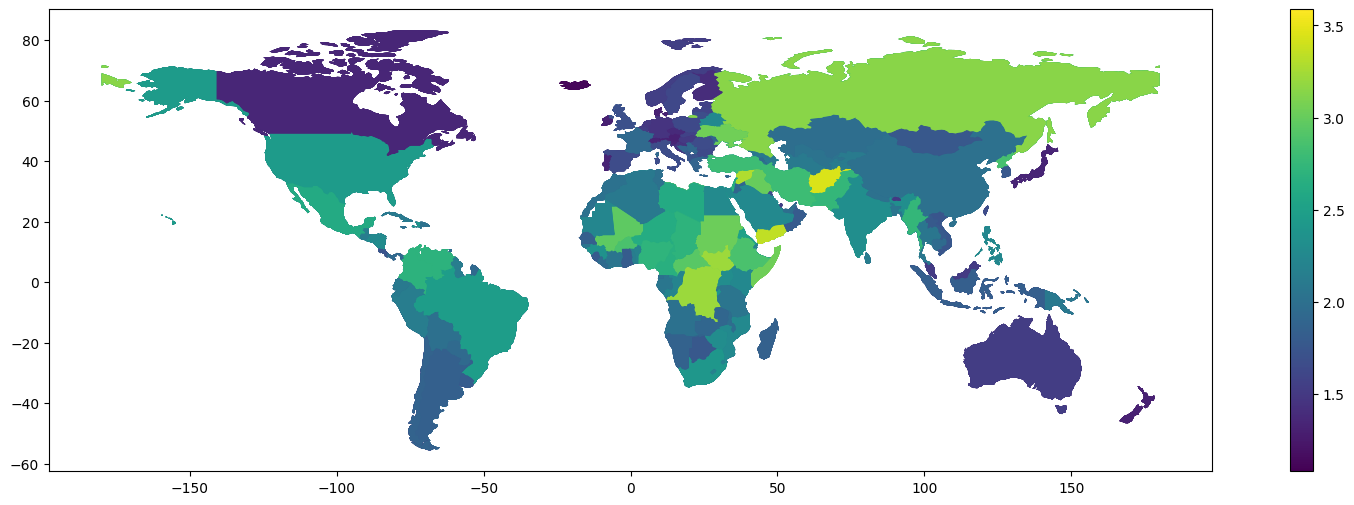

In [42]:
figsize = (20, 6)
norm = matplotlib.colors.LogNorm(vmin=gdf['Overall Scores'].min(), vmax=gdf['Overall Scores'].max())

gdf.to_crs('EPSG:4326').plot("Overall Scores", 
                                   figsize=figsize, 
                                   legend=True);


<Axes: >

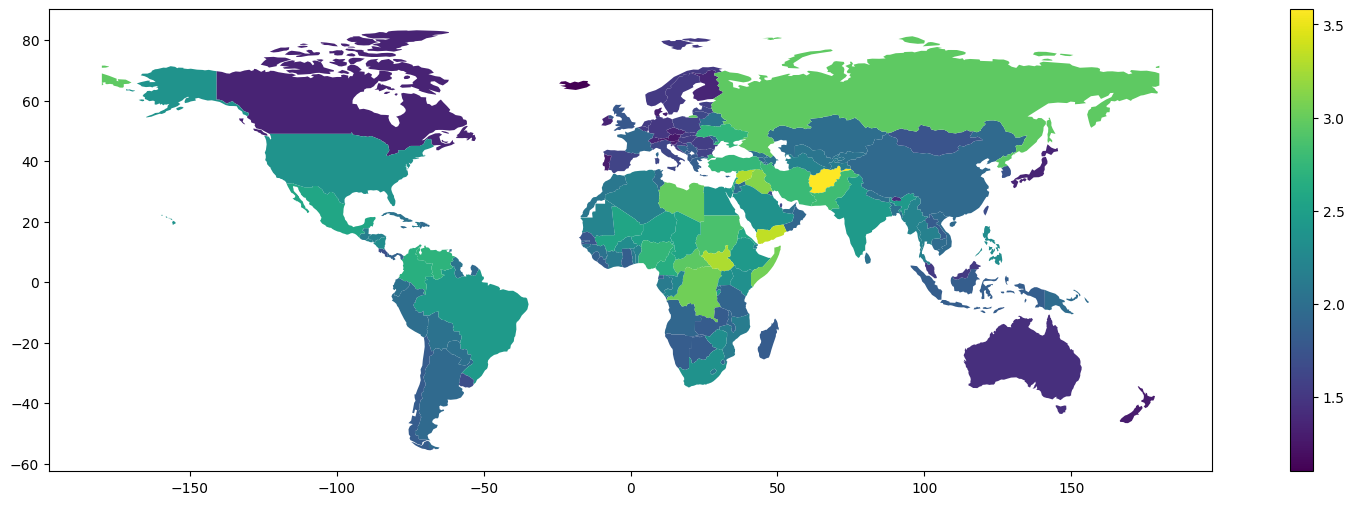

In [39]:
selected_year = 2020

figsize = (20, 6)
gdf[gdf['year'] == selected_year].to_crs('EPSG:4326').plot(
    "Overall Scores", 
    figsize=figsize, 
    legend=True
)

<Axes: >

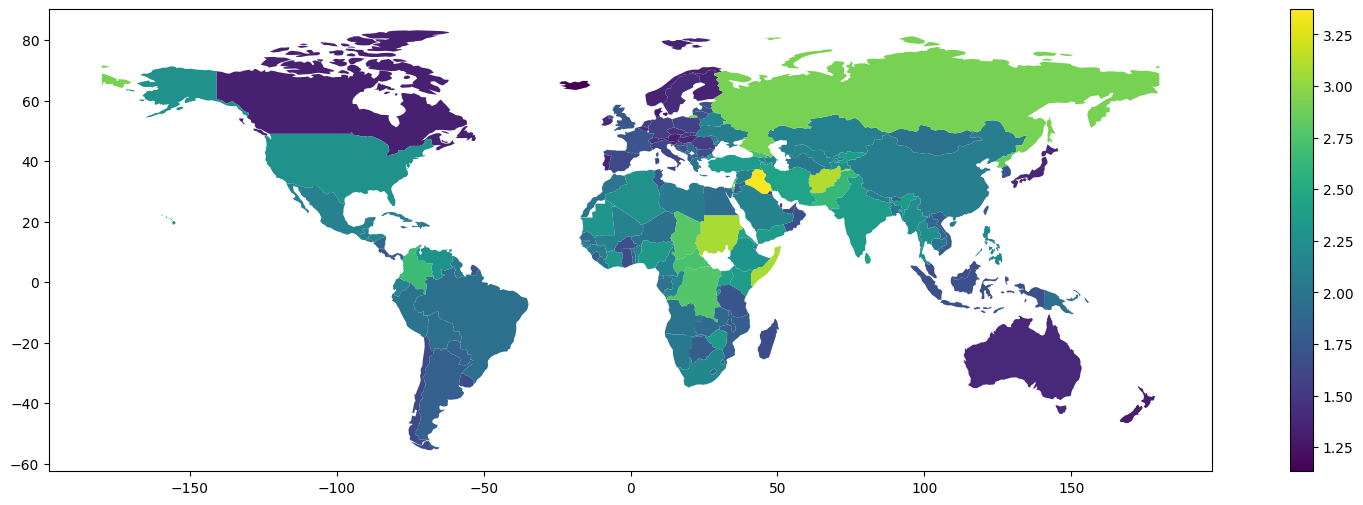

In [43]:
selected_year = 2008

figsize = (20, 6)
gdf[gdf['year'] == selected_year].to_crs('EPSG:4326').plot(
    "Overall Scores", 
    figsize=figsize, 
    legend=True
)

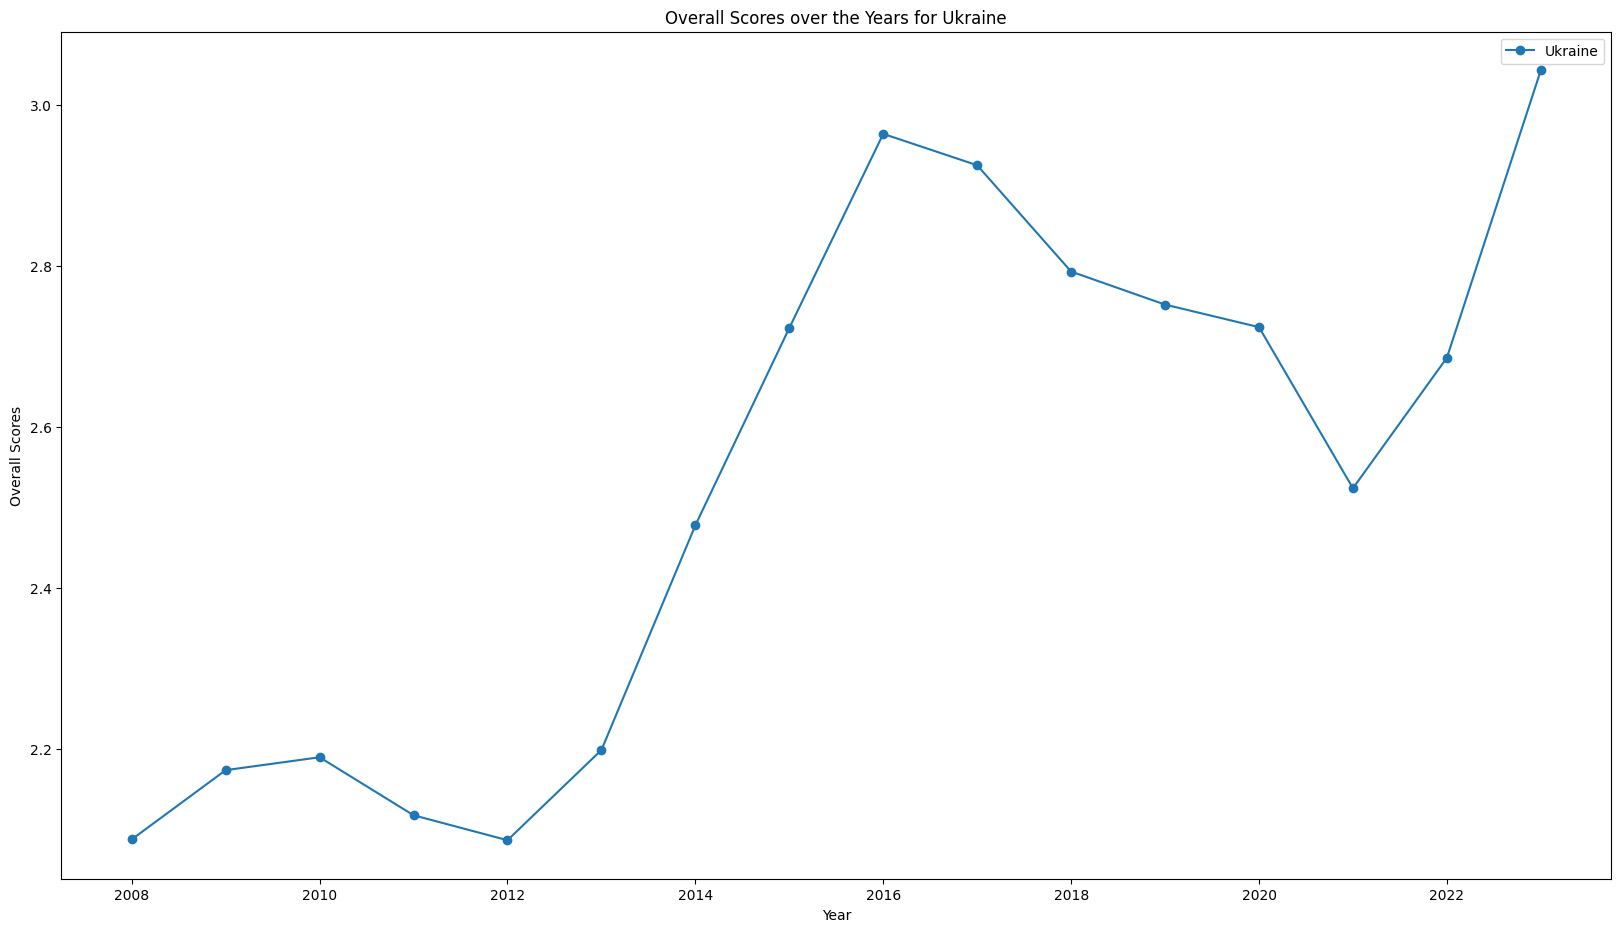

In [65]:
import matplotlib.pyplot as plt

# Assuming 'gdf' is your GeoDataFrame and it contains 'year', 'Overall Scores', and 'country' columns

# Filter the GeoDataFrame for Overall Scores greater than or equal to 3
gdf_filtered = gdf[gdf['Mean Overal score'] >= 1]

# Get a list of unique countries that meet the condition
#countries = gdf_filtered['Country'].unique()
countries = ['Ukraine']

# Create a figure
fig, ax = plt.subplots(figsize=(20, 11))

# Plot each country's scores in the same plot
for country in countries:
    # Filter the DataFrame for the current country
    country_data = gdf_filtered[gdf_filtered['Country'] == country]
    # Plot 'Overall Scores' against 'year' for the current country
    ax.plot(country_data['year'], country_data['Overall Scores'], marker='o', label=country)

# Set the title and labels
ax.set_title('Overall Scores over the Years for Ukraine')
ax.set_xlabel('Year')
ax.set_ylabel('Overall Scores')

# Enable the legend
ax.legend()

# Show the plot
plt.show()


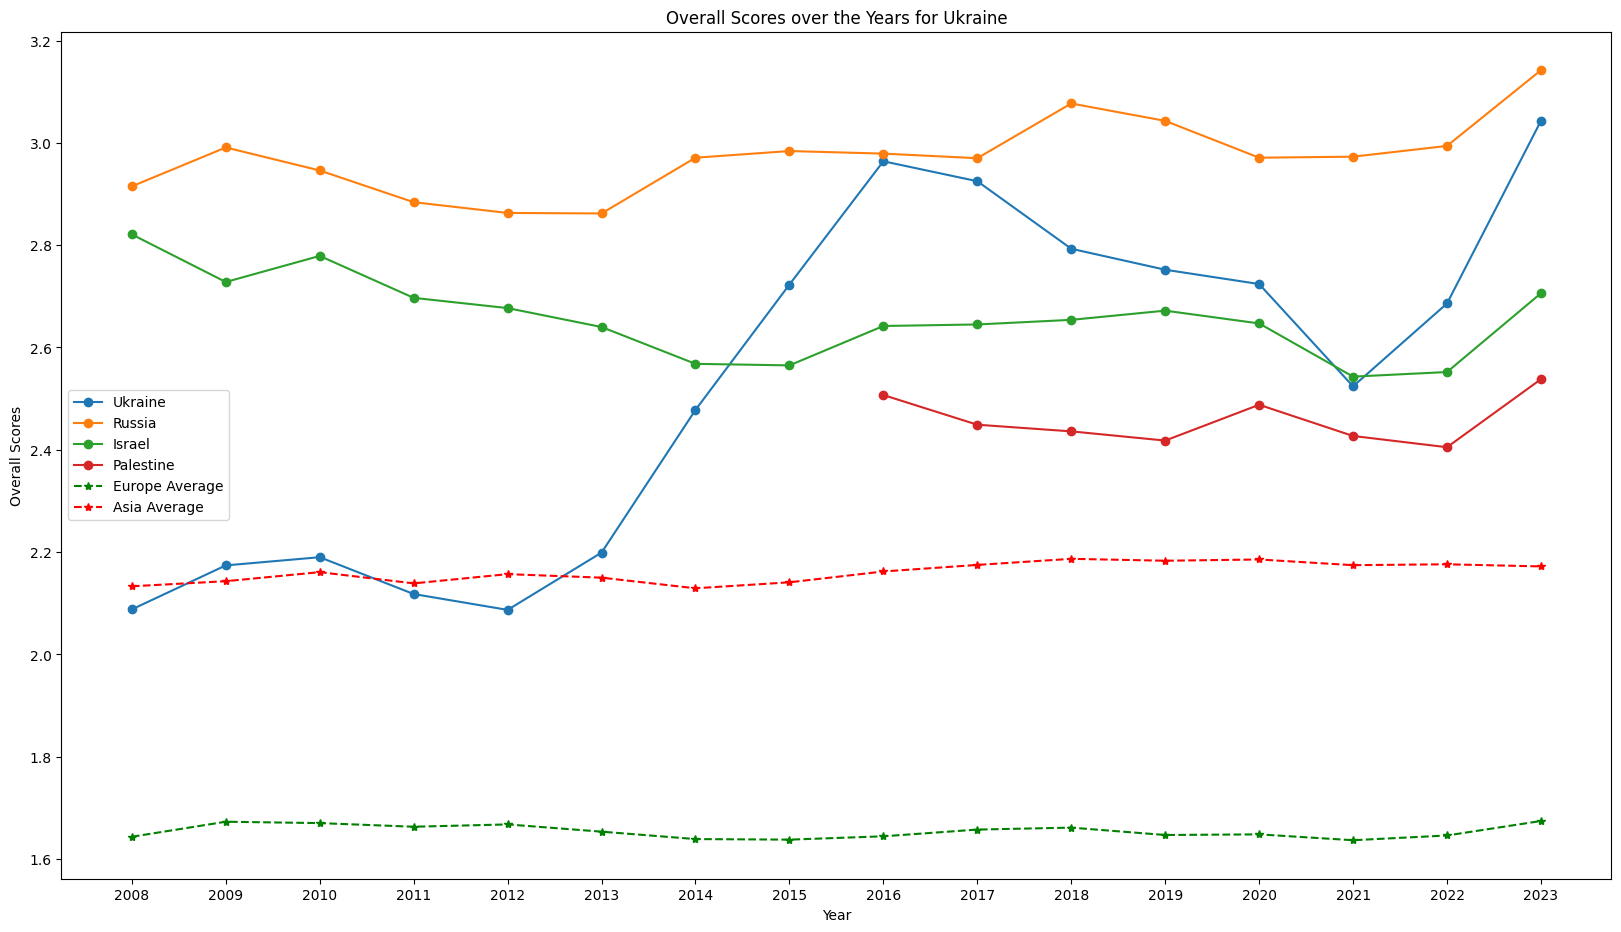

In [94]:
import matplotlib.pyplot as plt
Europe_mean_scores = gdf[gdf['continent'] == 'Europe'].groupby('year')['Overall Scores'].mean()
Asia_mean_scores = gdf[gdf['continent'] == 'Asia'].groupby('year')['Overall Scores'].mean()
#Africa_mean_scores = gdf[gdf['continent'] == 'Africa'].groupby('year')['Overall Scores'].mean()
#South_America_mean_scores = gdf[gdf['continent'] == 'South America'].groupby('year')['Overall Scores'].mean()
#North_America_mean_scores = gdf[gdf['continent'] == 'North America'].groupby('year')['Overall Scores'].mean()
#Oceania_mean_scores = gdf[gdf['continent'] == 'Oceania'].groupby('year')['Overall Scores'].mean()

# Assuming 'gdf' is your GeoDataFrame and it contains 'year', 'Overall Scores', and 'country' columns

# Filter the GeoDataFrame for Overall Scores greater than or equal to 3
gdf_filtered = gdf[gdf['Mean Overal score'] >= 1]

# Get a list of unique countries that meet the condition
#countries = gdf_filtered['Country'].unique()
countries = ['Ukraine', 'Russia', "Israel", "Palestine"]

# Create a figure
fig, ax = plt.subplots(figsize=(20, 11))

# Plot each country's scores in the same plot
for country in countries:
    # Filter the DataFrame for the current country
    country_data = gdf_filtered[gdf_filtered['Country'] == country]
    # Plot 'Overall Scores' against 'year' for the current country
    ax.plot(country_data['year'], country_data['Overall Scores'], marker='o', label=country)
    #ax.plot(country_data['year'], country_data['Safety and Security'], marker='x', label='Safety and Security')
    #ax.plot(country_data['year'], country_data['Ongoing Conflict'], marker='x', label='Ongoing Conflict')
    #ax.plot(country_data['year'], country_data['Militarian'], marker='x', label='Militarian')

ax.plot(Europe_mean_scores.index, Europe_mean_scores, marker='*', linestyle='--', color='green', label='Europe Average') 
ax.plot(Asia_mean_scores.index, Asia_mean_scores, marker='*', linestyle='--', color='red', label='Asia Average')    
#ax.plot(Africa_mean_scores.index, Africa_mean_scores, marker='o', linestyle='--', color='purple', label='Africa Average')    
#ax.plot(South_America_mean_scores.index, South_America_mean_scores, marker='o', linestyle='--', color='lightgreen', label='South America Average') 
#ax.plot(North_America_mean_scores.index, North_America_mean_scores, marker='o', linestyle='--', label='North America Average') 
#ax.plot(Oceania_mean_scores.index, Oceania_mean_scores, marker='o', linestyle='--', label='Oceania Average') 
# Set the title and labels

years = sorted(gdf['year'].unique())
ax.set_xticks(years)

ax.set_title('Overall Scores over the Years for Ukraine')
ax.set_xlabel('Year')
ax.set_ylabel('Overall Scores')

# Enable the legend
ax.legend()

# Show the plot
plt.show()


In [88]:
df2['Country'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Belarus',
       'Bolivia', 'Brazil', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d' Ivoire", 'Cameroon',
       'Democratic Republic of the Congo', 'Republic of the Congo',
       'Colombia', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana',
       'Guinea', 'The Gambia', 'Guinea-Bissau', 'Equatorial Guinea',
       'Greece', 'Guatemala', 'Guyana', 'Honduras', 'Croatia', 'Haiti',
       'Hungary', 'Indonesia', 'India', 'Ireland', 'Iran', 'Iraq',


In [100]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Assuming 'gdf' is your GeoDataFrame

# Start by creating a Dash application
app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    # Dropdown for country selection
    dcc.Dropdown(
        id='country-selector',
        options=[{'label': country, 'value': country} for country in gdf['Country'].unique()],
        value=['Ukraine', 'Russia'],  # default value
        multi=True  # allow multiple selections
    ),
    # Graph object to display the plot
    dcc.Graph(id='score-plot')
])

# Callback to update the graph based on the dropdown selection
@app.callback(
    Output('score-plot', 'figure'),
    [Input('country-selector', 'value')]
)
def update_graph(selected_countries):
    # Filter the GeoDataFrame for selected countries
    filtered_df = gdf[gdf['Country'].isin(selected_countries)]
    
    # Create the plotly figure
    fig = px.line(filtered_df, x='year', y='Overall Scores', color='Country')
    
    # Define the tick values to be every unique year in your dataset
    tickvals = sorted(filtered_df['year'].unique())

    # Update layout to explicitly set x-axis tick marks
    fig.update_layout(
        xaxis=dict(
            tickmode='array',
            tickvals=tickvals
        )
    )
    # Return the figure to the Dash Graph object
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
